## 1. Winter is Coming. Let's load the dataset ASAP
<p>If you haven't heard of <em>Game of Thrones</em>, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series <em>A Song of Ice and Fire</em> by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the  Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>
<p>This dataset constitutes a network and is given as a text file describing the <em>edges</em> between characters, with some attributes attached to each edge. Let's start by loading in the data for the first book <em>A Game of Thrones</em> and inspect it.</p>

#### Task 1: Instructions
Load in and inspect the edge list of the first book.

 - Import the pandas module.
 - Load the csv file for book 1 from datasets/book1.csv and assign it to book1.
 - Print out the head (first 5 rows by default) of the DataFrame book1.

In [112]:
# Importing modules
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv("datasets/book1.csv")

# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [113]:
book1.shape

(684, 5)

## 2. Time for some Network of Thrones
<p>The resulting DataFrame <code>book1</code> has 5 columns: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>
<p>Once we have the data loaded as a pandas DataFrame, it's time to create a network. We will use <code>networkx</code>, a network analysis library, and create a graph object for the first book.</p>

#### Task 2: Instructions
Create a graph object for the first book.

 - Import the networkx module and give it the alias nx.
 - Create an empty Graph object and assign it to the variable G_book1.
 - networkx provides different kind of graph objects, `graph, digraph, multigraph, multidigraph`. In this case, you will create a graph because the network is undirected, that is, an edge from character A to character B implies that there exists an edge the other way too, from character B to character A.

To read more about graph types you can consult the networkx documentation.

In [115]:
# Importing modules
# ... YOUR CODE FOR TASK 2 HERE ...
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

## 3. Populate the network with the DataFrame
<p>Currently, the graph object <code>G_book1</code> is empty. Let's now populate it with the edges from <code>book1</code>. And while we're at it, let's load in the rest of the books too!</p>

#### Task 3: Instructions
Add nodes and edges information to the network for book 1.

 - Iterate through the DataFrame book1 row-wise using iterrows().
 - Add edges to the graph object G_book1 using add_edge().
 
To populate the graph you need to iterate through `book1` to add weighted edges to the G_book1 network using `add_edge(source, target, weight=)`. Remember that the `weight=` argument needs to be named explicitly when using `add_edge`. When iterating through the DataFrame, keep in mind that `iterrows()` returns a 2-tuple of an index and a pandas Series object. You need to use only the second part, that is, the pandas Series object to get all the information needed to populate the network. Here is [a StackOverflow question that explains how to use iterrows()](https://stackoverflow.com/q/16476924).

You only need the source, target, and weight column to create the character co-occurrence network so only add this information to G_book1. To read more about the `add_edge()` method you can consult the [networkx documentation](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html).

Since we want to analyze all five books we have supplied code for creating the graphs for the other four books.

In [117]:
# Iterating through the DataFrame to add edges
# ... YOUR CODE HERE ...
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight = edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [118]:
books

## 4. Finding the most important character in Game of Thrones
<p>Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network Science offers us many different metrics to measure the importance of a node in a network. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.</p>
<p>First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called <em>degree centrality</em>.</p>
<p>Using this measure, let's extract the top ten important characters from the first book (<code>book[0]</code>) and the fifth book (<code>book[4]</code>).</p>

#### Task 4: Instructions
Find the most important characters according to degree centrality.

 - Use `nx.degree_centrality(graph)` to calculate the centrality of all nodes from the first book (`book[0])` and the fifth book (`book[4]`).
 - Sort the resulting dictionaries `deg_cen_book1` and `deg_cen_book5` according to decreasing values and store the top 10 in `sorted_deg_cen_book1` and `sorted_deg_cen_book5`.
 - Print out `sorted_deg_cen_book1` and `sorted_deg_cen_book5`.
 
To calculate degree centrality every node is assigned a number between 0 and 1 by computing the degree (the number of neighbors) and normalizing it by the total possible number of neighbors it can have, i.e n - 1 where n is the number of nodes in the network.

See this StackOverflow answer for how to sort a dictionary in python: https://stackoverflow.com/a/2258273

In [120]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
# ... YOUR CODE FOR TASK 4 ...
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


#### HINT
To calculate the degree centrality of book 1 and book 5 you can use

`deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])`

keep in mind that books is a list of networks where books[0] will give out the character co-occurrence network for the first book.

To sort the resulting dictionary by value you can use sorted().

`sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]`
`sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]`

You can use a lambda function to tell the sorted function to look at the value in the (key, value) tuple and setting reverse=True sets the sorting order from largest to smallest.

In [121]:
# deg_cen_book1

## 5. Evolution of importance of characters over the books
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens... ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

#### Task 5: Instructions
Plot the evolution of degree centrality over the books for some of the characters.

 - You are given a list evol that contains the computed degree centrality from all the books.
 - Create a DataFrame with character names as columns, and index as books, where every entry is the degree centrality of the character in that particular book using pd.DataFrame.from_records.
 - Plot the columns Eddard-Stark, Tyrion-Lannister, Jon-Snow from the DataFrame degree_evol_df using .plot().
See [the pandas documentation for](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_records.html) pd.DataFrame.from_records for more info.

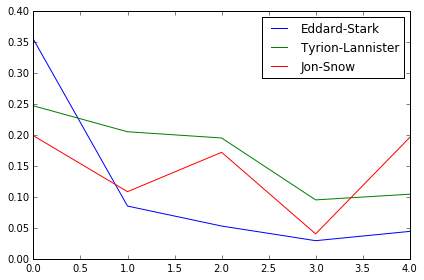

In [123]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
# YOUR CODE FOR TASK 5 HERE ...
degree_evol_df[["Eddard-Stark", "Tyrion-Lannister","Jon-Snow"]].plot()

In [124]:
degree_evol_df.head()

,Addam-Marbrand,Aegon-Frey-(son-of-Stevron),Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aegon-V-Targaryen,Aemon-Targaryen-(Dragonknight),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-I-Targaryen,...,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Yohn-Royce,Yoren,Yorko-Terys,Ysilla,Yurkhaz-zo-Yunzak,Zei,Zollo
0,0.010753,NaN,0.010753,NaN,NaN,NaN,0.037634,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.037634,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.019380,NaN,0.003876,NaN,0.023256,0.003876,0.007752,0.003876,...,NaN,NaN,0.015504,NaN,0.046512,NaN,NaN,NaN,NaN,NaN
2,0.026490,0.013245,0.009934,0.003311,NaN,0.003311,0.059603,NaN,NaN,NaN,...,NaN,NaN,0.033113,0.003311,NaN,NaN,NaN,NaN,0.003311,0.006623
3,0.014652,NaN,NaN,0.003663,0.003663,NaN,0.025641,NaN,0.051282,NaN,...,NaN,NaN,NaN,0.029304,NaN,0.003663,NaN,NaN,NaN,0.007326
4,NaN,NaN,0.003165,0.047468,NaN,NaN,0.015823,0.009494,0.006329,NaN,...,0.009494,0.015823,0.006329,NaN,NaN,NaN,0.018987,0.003165,NaN,NaN


## 6. What's up with Stannis Baratheon?
<p>We can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>
<p>Now let's look at various other measures like <em>betweenness centrality</em> and <em>PageRank</em> to find important characters in our Game of Thrones character co-occurrence network and see if we can uncover some more interesting facts about this network. Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.</p>

#### Task 6: Instructions

Find the importance and evolution of characters according to betweenness centrality.

 - Use `nx.betweenness_centrality(graph, weight='weight')` to calculate the weighted betweenness centrality of all the books.
 - Create a DataFrame `betweenness_evol_df` just like in the previous task but this time do this for betweenness centrality.
 - You have been given code that finds the top 4 characters in each book and puts them into list_of_char.
 - Plot the columns in list_of_char in the DataFrame betweenness_evol_df using .plot() with the argument figsize=(13, 7).
 
Remember to use `.fillna(0)` when creating betweenness_evol_df as it's possible that a character is not in every book. This would result in `NaN` entries and we want to avoid that so we replace `NaN` with zero.

The intuition behind betweenness centrality is to find nodes which hold the network together, that is, if you remove such a node you are breaking apart the network. In a more mathematical way, betweenness centrality is calculated by finding shortest paths between all pairs of nodes and finding the node through which most of the paths pass.

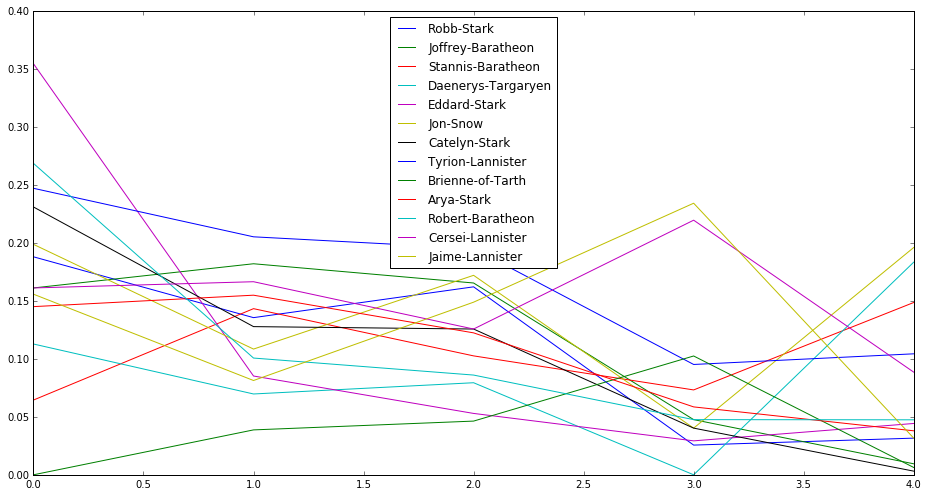

In [126]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.degree_centrality(book) for book in books]

# Making a DataFrame from the list
betweenness_evol_df =  pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
# ... YOUR CODE FOR TASK 6 HERE ...
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

## 7. What does the Google PageRank algorithm tell us about Game of Thrones?
<p>We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

#### Task 7: Instructions
Find the importance and evolution of characters according to PageRank.

 - Repeat the previous task for PageRank using `nx.pagerank()` and create a list of PageRank measures for all the books.
 - Create a DataFrame using pd.DataFrame.from_records.
 - Plot the columns in list_of_char in the DataFrame evol_df using `.plot()` with the argument `figsize=(13, 7)`.

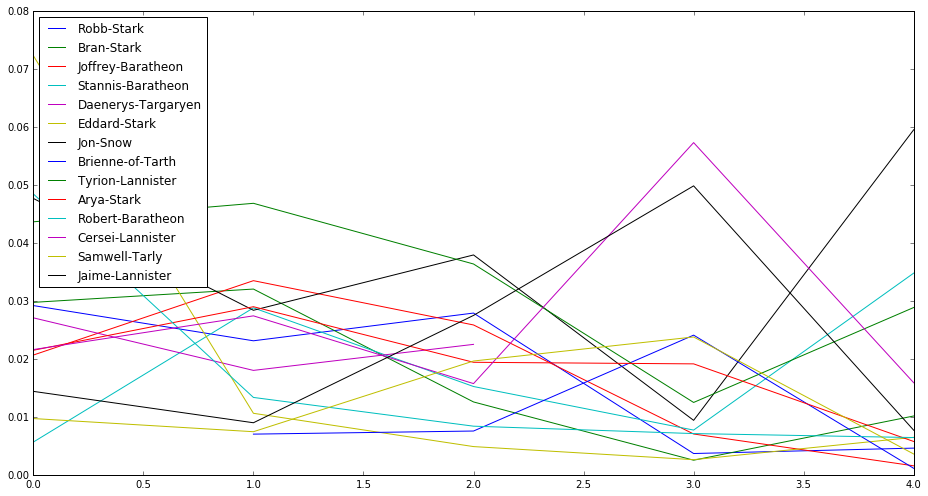

In [128]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df =  pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
# ... YOUR CODE FOR TASK 6 HERE ...
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

## 8. Correlation between different measures
<p>Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality: He is important in the first book but dies into oblivion over the book series.</p>
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality and degree centrality for the fifth book using Pearson correlation.</p>

#### Task 8: Instructions
Find the correlation between the three methods of measuring importance.

 - Create a DataFrame using `pd.DataFrame.from_records` using the list of all measures for books[4], and assign it to cor.
 - Calculate the correlation using .corr().
 
Make sure to take the transpose of the DataFrame `cor`, that is, `cor.T` first before calculating the correlation otherwise you get the correlation between characters and not the correlation between measures.

In [130]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
# ... YOUR CODE FOR TASK 6 HERE ...
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


## 9. Conclusion
<p>We see a high correlation between these three measures for our character co-occurrence network.</p>
<p>So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures? </p>

#### Task 9: Instructions
 - Use the cor DataFrame to find the most important character in the fifth book according to degree centrality, betweenness centrality, and PageRank.
 - Print out the top character(s) according to these three measures.
This task can easily be completed using the idxmax method.

Further Reading
If you more interested in network analysis you can have a look at the following resources:

[networkofthrones](https://networkofthrones.wordpress.com/) is a blog dedicated to data collection and all things networks about Game of Thrones.

[bookworm](https://github.com/harrisonpim/bookworm): Extracting social networks from novels.

[Part 2](https://www.datacamp.com/courses/network-analysis-in-python-part-2) of the DataCamp course on Network Analysis using Python.

In [132]:
cor

,Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-II-Targaryen,Aggo,Alliser-Thorne,Alys-Karstark,Alysane-Mormont,...,Wun-Weg-Wun-Dar-Wun,Wylis-Manderly,Wyman-Manderly,Xaro-Xhoan-Daxos,Yandry,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Ysilla,Yurkhaz-zo-Yunzak
0,0.000682,0.008693,0.003236,0.001745,0.001313,0.001642,0.002365,0.000872,0.002135,0.002910,...,0.002419,0.000693,0.009620,0.001455,0.003944,0.001527,0.003352,0.001596,0.002882,0.000682
1,0.000000,0.049057,0.006852,0.000000,0.006277,0.000000,0.002969,0.000000,0.000000,0.000498,...,0.000070,0.000000,0.061129,0.000000,0.000000,0.000441,0.000057,0.000000,0.005425,0.000000
2,0.003165,0.047468,0.015823,0.009494,0.006329,0.009494,0.018987,0.003165,0.009494,0.009494,...,0.012658,0.003165,0.044304,0.006329,0.022152,0.009494,0.015823,0.006329,0.018987,0.003165


In [133]:
cor.idxmax(axis=1)

0             Jon-Snow
1    Stannis-Baratheon
2             Jon-Snow
dtype: object

In [134]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
# ... YOUR CODE FOR TASK 6 HERE ...
print(p_rank, b_cent, d_cent)

Jon-Snow Stannis-Baratheon Jon-Snow


### networkx Algorithm Covered:
 - Degree Centrality
 - Betweenness Centrality
 - PageRank